In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time
CITY_POSITIONS=[[0.62438291 ,0.82178505],
 [0.04169322 ,0.87324915],
 [0.41212068 ,0.75284606],
 [0.36344985 ,0.01829036],
 [0.68850325 ,0.54933196],
 [0.87354669 ,0.64206707],
 [0.22960069 ,0.73200151],
 [0.18292416 ,0.72679727],
 [0.29964816 ,0.65428754],
 [0.17463048 ,0.93999983],
 [0.47599872 ,0.79141143],
 [0.39267136 ,0.43828946],
 [0.75460859 ,0.40501416],
 [0.27784902 ,0.92334604],
 [0.83258482 ,0.39183078],
 [0.63282944 ,0.14352982],
 [0.72778758 ,0.79120373],
 [0.83078051 ,0.04707529],
 [0.74970826 ,0.45880596],
 [0.37795989 ,0.2785738 ]]
# CITY_POSITIONS=np.array(CITY_POSITIONS)

In [11]:
class TSP():
    def __init__(self, cn = 10, ps = None):
        self.city_num = cn
        if ps == None:
            self.positions = np.random.rand(self.city_num, 2)
#             self.positions = np.array(CITY_POSITIONS)
        else:
            self.positions = np.array(ps)
        
    def rand_new(self):
        return np.random.permutation(self.city_num)

    def getv(self,o):
        theor = self.positions[o]
        dis = 0
        for i in range(self.city_num-1):
            dis += np.sqrt((theor[i][0] - theor[i+1][0])**2 + (theor[i][1] - theor[i+1][1])**2)
        dis += np.sqrt((theor[0][0] - theor[-1][0])**2 + (theor[0][1] - theor[-1][1])**2)
        return dis 
    
    def draw(self, o, v):
        x=self.positions[:, 0].T
        y=self.positions[:, 1].T
        for i in range(len(x)):
            plt.annotate(i+1,xy = (x[i], y[i]), xytext = (x[i]+0.01, y[i]+0.01))
        theor = self.positions[o]
        plt.plot(theor[:,0],theor[:,1],'or')
        nt = np.insert(theor,len(theor),theor[0,:],axis = 0)
        plt.plot(nt[:,0],nt[:,1])
        for i in range(len(x)):
            plt.annotate(i+1,xy = (x[i], y[i]), xytext = (x[i]+0.01, y[i]+0.01))
        plt.text(-0.05, -0.05, "Total distance=%.2f" % self.getv(o), fontdict={'size': 20, 'color': 'red'})
        plt.xlim((-0.1, 1.1))
        plt.ylim((-0.1, 1.1))
        plt.gca().set_aspect('equal', adjustable='box')
        plt.pause(0.01)
        
        
    
            



class SA():
    def __init__(self, prob_v, prob_p, prob_s=None, T=10, T_end=1e-5, L=200, r=0.98):
        self.T = T              
        self.T_end = T_end    
        self.L = L              
        self.r = r    
        
        self.f = prob_v  # function
        self.sample = prob_p  # problem

        self.x = self.sample()
        self.v = self.f(self.x)

        self.iter_num = 0
        # print
        self.vm = []
        self.tm = []
        if prob_s == None:
            self.drawX = print
        else:
            self.drawX = prob_s
        
        
#         self.o=None
        
    # def new_sample(self):
    #     return np.random.rand()*(self.lim[1] - self.lim[0])
    
    """accept new"""
    def metropolis(self, n):
        nv = self.f(n)
        dv = nv - self.v 
        if dv < 0 or np.exp(-dv/self.T) > np.random.rand():
            self.x = n
            self.v = nv

        
    def solve(self):
        while self.T > self.T_end:
            for i in range(self.L):
                n = self.sample()
                self.metropolis(n)
                self.vm.append(self.v)
            self.T *= self.r
            self.iter_num += 1
            self.tm.append(self.T)
        best_idx = np.argmin(self.vm)
        self.v=self.vm[best_idx]
        self.o=self
        return self.vm[best_idx]
    
    def drawValueChange(self):
        plt.figure(figsize=(10,10))
        plt.subplot(1,2,1)
        self.drawX(self.x, self.v)
        print("minimal value: ",self.v)
        plt.subplot(1,2,2)
        plt.plot(list(range(self.iter_num*self.L)),self.vm)
        #plt.plot(np.linspace(0,self.iter_num*self.L,self.iter_num),self.tm,'r')
        plt.show()

5.634342487363872


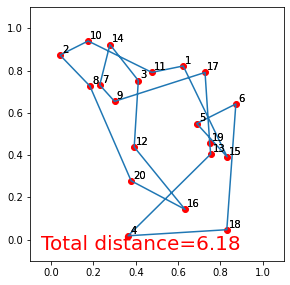

minimal value:  6.180867248517329


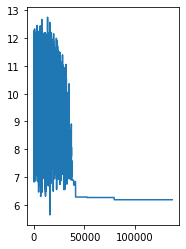

In [12]:
tsp = TSP(20,CITY_POSITIONS)
sa = SA(tsp.getv, tsp.rand_new, tsp.draw)
sa.solve()
print(sa.solve())
sa.drawValueChange()

In [ ]:
dis_all=[]
time_all=[]
for i in range(20):

#求均值
dis_mean = np.mean(dis_all)
#求方差
dis_var = np.var(dis_all)
#求极值
best_idx = np.argmin(dis_all)
worst_idx = np.argmax(dis_all)
print('---------距离--------')
print("平均值为：%f" % dis_mean)
print("方差为：%f" % dis_var)
print("最优值为:第%d次:%f"% (best_idx+1, dis_all[best_idx]))
print("最差值为:第%d次:%f"% (worst_idx+1, dis_all[worst_idx]))
time_mean = np.mean(time_all)
time_var = np.var(time_all)
best_id = np.argmin(time_all)
worst_id = np.argmax(time_all)
print('---------时间--------')
print("平均值为：%f" % time_mean)
print("方差为：%f" % time_var)
print("最优值为:第%d次:%f"% (best_id+1, time_all[best_id]))
print("最差值为:第%d次:%f"% (worst_id+1, time_all[worst_id]))

In [9]:
dis = 0
theor=CITY_POSITIONS
for i in range(20-1):
    dis += np.sqrt((theor[i][0] - theor[i+1][0])**2 + (theor[i][1] - theor[i+1][1])**2)
dis += np.sqrt((theor[0][0] - theor[-1][0])**2 + (theor[0][1] - theor[-1][1])**2)

In [10]:
dis

9.375251065462967